# Objective
* The main objective of the project is to identify the optimal location for a business in Haiti, specifically in the West Department. This can be a new business or an extension of an existing business in the form of a branch office.

# Data Source

* The data used for this project comes from several sources, first of all to have all the companies in the western department I had to do some web scraping and then for the demographic information I had access to the results of a survey conducted by the <b>Office For The Coordination Of Humanitarian Affairs</b> on the density of the Haitian population by department and by municipality.

* Other information such as average per capita income, total activity rate, and tax revenues by department were obtained via articles on the Haitian economy.

### Importing Libraries

In [48]:
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

### Loading Dataset

In [49]:
#Loading Business Data Files
kenscoff       = pd.read_excel('business_paup.xlsx', sheet_name='kenscoff')
paup           = pd.read_excel('business_paup.xlsx', sheet_name='paup')
carrefour      = pd.read_excel('business_paup.xlsx', sheet_name='carrefour')
delmas         = pd.read_excel('business_paup.xlsx', sheet_name='delmas')
crxdesbouquets = pd.read_excel('business_paup.xlsx', sheet_name='crxdesbouquets')
tabarre        = pd.read_excel('business_paup.xlsx', sheet_name='tabarre')
leogane        = pd.read_excel('business_paup.xlsx', sheet_name='leogane')
petitgoave     = pd.read_excel('business_paup.xlsx', sheet_name='petit_goave')
grandgoave     = pd.read_excel('business_paup.xlsx', sheet_name='grand_goave')
cabaret        = pd.read_excel('business_paup.xlsx', sheet_name='cabaret')
arcahaie       = pd.read_excel('business_paup.xlsx', sheet_name='arcahaie')
ganthier       = pd.read_excel('business_paup.xlsx', sheet_name='ganthier')
gressier       = pd.read_excel('business_paup.xlsx', sheet_name='gressier')
pv             = pd.read_excel('business_paup.xlsx', sheet_name='PetionVille')
caphaitien     = pd.read_excel('business_paup.xlsx', sheet_name='caphaitien')
limonade       = pd.read_excel('business_paup.xlsx', sheet_name='limonade')
milot          = pd.read_excel('business_paup.xlsx', sheet_name='milot')
limbe          = pd.read_excel('business_paup.xlsx', sheet_name='limbe')
fortliberte    = pd.read_excel('business_paup.xlsx', sheet_name='fort_liberte')
ouanaminthe    = pd.read_excel('business_paup.xlsx', sheet_name='ouanaminthe')
jacmel         = pd.read_excel('business_paup.xlsx', sheet_name='jacmel')
cayesjacmel    = pd.read_excel('business_paup.xlsx', sheet_name='cayesjacmel')
gonaives       = pd.read_excel('business_paup.xlsx', sheet_name='gonaives')
saintmarc      = pd.read_excel('business_paup.xlsx', sheet_name='saintmarc')


#Population dataset file
population     = pd.read_excel('hti-pop-statistics.xlsx')

#Municipality geo location
commune_geolocalisation = pd.read_excel('hti_commune_geolocation.xlsx')

In [50]:
# Business Dataset file concatenation
dataset = pd.concat([paup,carrefour,delmas,kenscoff,crxdesbouquets,tabarre,
                     leogane,petitgoave,grandgoave,cabaret,arcahaie,ganthier,
                     gressier,pv,caphaitien,limonade,milot,limbe,fortliberte,
                     ouanaminthe,jacmel,cayesjacmel,gonaives,saintmarc])
display(dataset.shape)
display(dataset.head())

(5232, 6)

,adm2code,commune,name,secteur activite,category,address
0,HT0111,Port-au-Prince,Association Médicale Haïtienne (AMH),sante,ASSOCIATIONS PROFESSIONNELLES,"29, 1° avenue du Travail, Bois Verna, Port-au..."
1,HT0111,Port-au-Prince,Cabinet Munitio,service professionnel,AVOCATS ET CONSEILLERS JURIDIQUES,"42 bis, rue Villemenay, Bois Verna, Port-au-P..."
2,HT0111,Port-au-Prince,Berling s.a.,agroalimentaire,"RHUM,\t\t\t\t\t\t\t\t\t\t\tVINS ET SPIRITUEUX","Route Nationale #1, Sarthe 57, Port-au-Prince"
3,HT0111,Port-au-Prince,JEAN-GILLES André (Dr),sante,OPHTALMOLOGUES,"97, rue Oswald Durand, Clinique Médico-Chirurg..."
4,HT0111,Port-au-Prince,Kay Etienne,agroalimentaire,PROVISIONS ALIMENTAIRES,"101 rue l. Salomon, marché Salomon (après le s..."


In [51]:
# pd.pivot_table(data=dataset,index='adm2code',columns='secteur activite',aggfunc='count')

In [52]:
#Selecting the needed column
dataset=dataset.reset_index()
dataset = dataset.loc[:,['index','adm2code','commune','secteur activite','category']]
dataset.head()

,index,adm2code,commune,secteur activite,category
0,0,HT0111,Port-au-Prince,sante,ASSOCIATIONS PROFESSIONNELLES
1,1,HT0111,Port-au-Prince,service professionnel,AVOCATS ET CONSEILLERS JURIDIQUES
2,2,HT0111,Port-au-Prince,agroalimentaire,"RHUM,\t\t\t\t\t\t\t\t\t\t\tVINS ET SPIRITUEUX"
3,3,HT0111,Port-au-Prince,sante,OPHTALMOLOGUES
4,4,HT0111,Port-au-Prince,agroalimentaire,PROVISIONS ALIMENTAIRES


In [53]:
final_population = population.iloc[:,4:15]
final_population.head()

,adm2code,adm2_fr,Population,Femmes,Hommes,Enfants,Adultes,Filles,Garcons,Femmes adultes,Hommes adultes
0,HT0111,Port-au-Prince,1031710,544921,486789,417341,614369,220396,196945,324525,289844
1,HT0112,Delmas,413035,217283,195752,174211,238824,91646,82565,125637,113187
2,HT0113,Carrefour,534341,280296,254045,235636,298705,123841,111795,156455,142250
3,HT0114,Pétion-Ville,393779,202894,190885,163369,230410,83521,79848,119373,111037
4,HT0115,Kenscoff,60017,29928,30089,27366,32651,13623,13743,16305,16346


### Additional Information
* According to the academy of economic development the activity rate in haiti is 66.73% and according to the world bank the employment rate is 55% so we can say that on average the employment rate per commune is 55%. 
* According to the World Bank the RNB per capita is  $823.00 with an exchange rate of HTG 95 the average annual income per capita is HTG 78,185.00

In [54]:
final_population['income']= (((final_population['Population']*0.6673)*0.55)*68.5).astype('int')

In [55]:
final_population.head()

,adm2code,adm2_fr,Population,Femmes,Hommes,Enfants,Adultes,Filles,Garcons,Femmes adultes,Hommes adultes,income
0,HT0111,Port-au-Prince,1031710,544921,486789,417341,614369,220396,196945,324525,289844,25937733
1,HT0112,Delmas,413035,217283,195752,174211,238824,91646,82565,125637,113187,10383917
2,HT0113,Carrefour,534341,280296,254045,235636,298705,123841,111795,156455,142250,13433614
3,HT0114,Pétion-Ville,393779,202894,190885,163369,230410,83521,79848,119373,111037,9899811
4,HT0115,Kenscoff,60017,29928,30089,27366,32651,13623,13743,16305,16346,1508859


# Data Visualization

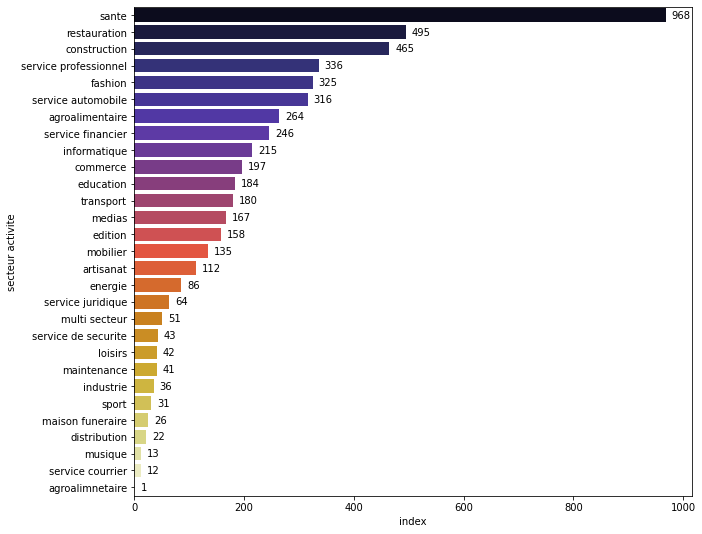

In [56]:
#business distribution by sector of activity
secteur=dataset.groupby(by='secteur activite').index.count().to_frame()
secteur=secteur.sort_values(by='index', ascending=False)
plt.figure(figsize=(10,9))
ax=sns.barplot(y=secteur.index,x='index', palette="CMRmap", data=secteur)
for container in ax.containers:
    ax.bar_label(container,padding=5.8)


# for p in ax.patches:
#     percentage = '{:.1f}%'.format(p.get_width())
#     y = p.get_x() + p.get_width()/2 # + 0.02
#     x = p.get_y() + p.get_height()/2
#     ax.annotate(percentage, (y, x), clip_on=True, weight='bold', color='red', fontsize=10)


In [10]:
#Fonction to create  pivot table and bar chat to visualize sector of activity by municipality
def table_bar(secteur=''):
    commune=dataset[dataset['secteur activite']==secteur].pivot_table(index='commune', columns='secteur activite', values='index', aggfunc='count')
    commune=commune.sort_values(by=secteur, ascending=False)
    plt.figure(figsize=(8,6))
    ax = sns.barplot(y=commune.index,x=secteur, palette="CMRmap", data=commune)
    for container in ax.containers:
        ax.bar_label(container, padding=2.5)
    return commune  

In [11]:
def depedency(col, data = dataset):
  tb = pd.crosstab(telco_data[col], telco_data["Churn"], normalize=False)
  chi2, pval, dof, expected = chi2_contingency(tb)
  Null_Hypothesis = " are independent with a significance level of 95%."
  Alternative_Hypothesis = " are not independent with a significance level of 95%."
  if pval<0.05:

    print(f"P_value = {pval}. The target variable Churn  and {col} {Alternative_Hypothesis}")
  else:
    print(f"P_value = {pval}. The target variable Churn  and {col} {Null_Hypothesis}")
  return cramers_stat(col= col)

### Business Of The Health Sector By Municipality

secteur activite,sante
commune,
Port-au-Prince,534
Pétion-Ville,220
Delmas,94
Carrefour,33
Tabarre,25
Cap-Haïtien,23
Croix-Des-Bouquets,8
Jacmel,8
Gonaïves,7


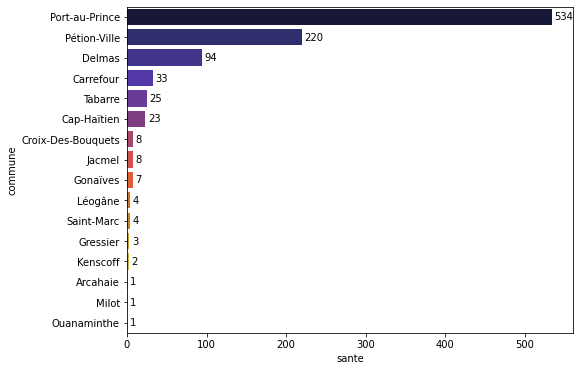

In [12]:
table_bar(secteur='sante')

### Business Of The Construction Sector By Municipality

secteur activite,construction
commune,
Pétion-Ville,138
Port-au-Prince,133
Delmas,72
Tabarre,46
Carrefour,18
Croix-Des-Bouquets,13
Jacmel,11
Cap-Haïtien,8
Léogâne,5


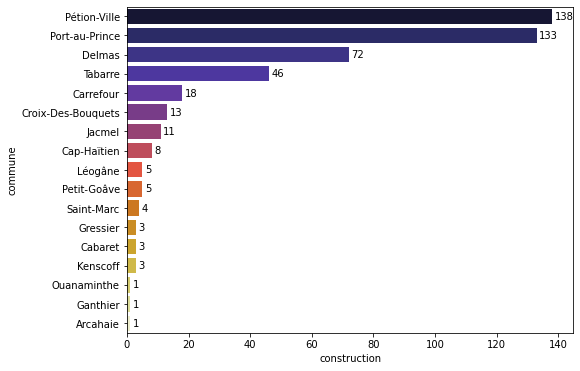

In [13]:
table_bar('construction')

### Automobile Sector Activity By Municipality

secteur activite,service automobile
commune,
Port-au-Prince,175
Pétion-Ville,49
Delmas,34
Tabarre,21
Carrefour,11
Cap-Haïtien,9
Croix-Des-Bouquets,3
Fort-Liberté,3
Saint-Marc,3


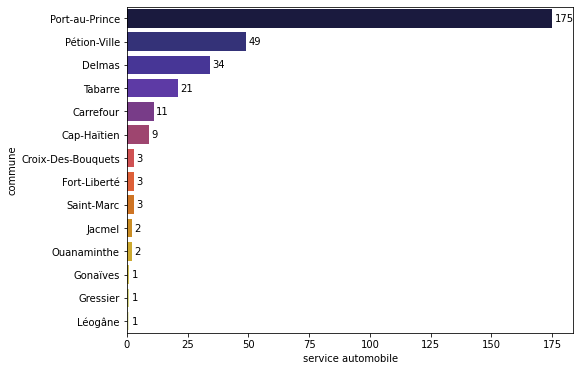

In [14]:
table_bar('service automobile')

### Restaurant Business By Municipality

secteur activite,restauration
commune,
Pétion-Ville,186
Port-au-Prince,93
Delmas,48
Jacmel,34
Cap-Haïtien,33
Tabarre,24
Carrefour,20
Kenscoff,16
Saint-Marc,9


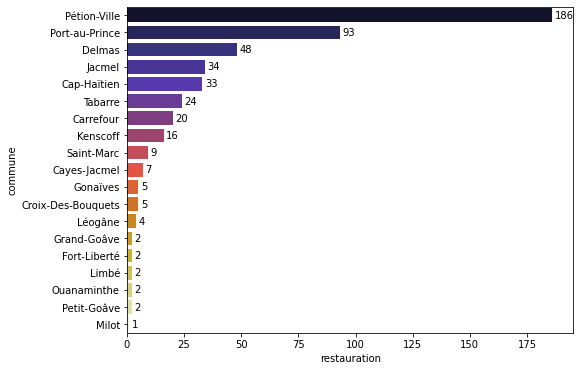

In [15]:
table_bar('restauration')

### Agri-food Sector Activity By Municipality

secteur activite,agroalimentaire
commune,
Port-au-Prince,100
Pétion-Ville,67
Tabarre,22
Delmas,21
Carrefour,18
Croix-Des-Bouquets,9
Jacmel,8
Kenscoff,5
Gressier,3


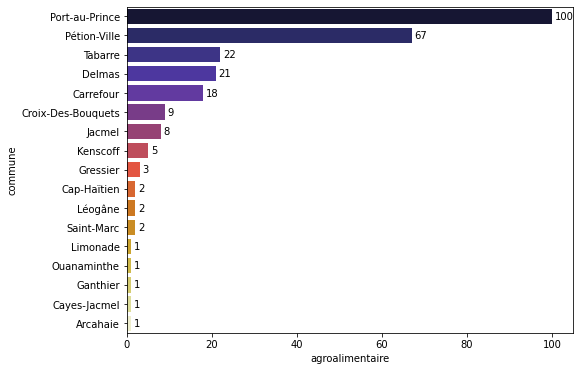

In [16]:
table_bar('agroalimentaire')

### Professional Sector Activity By Municipality

secteur activite,service professionnel
commune,
Pétion-Ville,169
Port-au-Prince,100
Delmas,30
Cap-Haïtien,11
Jacmel,5
Carrefour,4
Tabarre,4
Petit-Goâve,3
Croix-Des-Bouquets,2


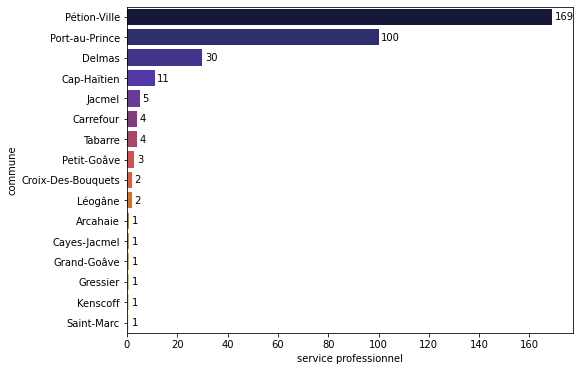

In [17]:
table_bar('service professionnel')

### Financial Sector Business By Municipality

secteur activite,service financier
commune,
Port-au-Prince,67
Pétion-Ville,49
Delmas,33
Carrefour,18
Cap-Haïtien,15
Gonaïves,10
Saint-Marc,10
Tabarre,8
Jacmel,8


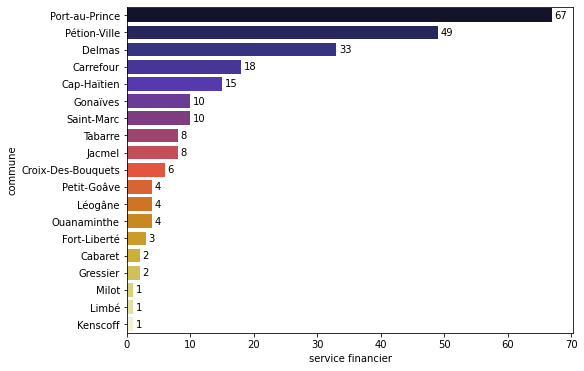

In [18]:
table_bar('service financier')

### IT Business By Municipality

secteur activite,informatique
commune,
Port-au-Prince,74
Pétion-Ville,71
Delmas,41
Tabarre,12
Léogâne,3
Cap-Haïtien,2
Carrefour,2
Croix-Des-Bouquets,2
Gonaïves,2


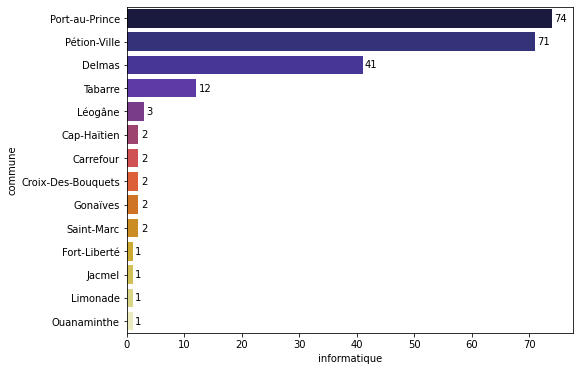

In [19]:
table_bar('informatique')

### Education Sector Activity By Municipality

secteur activite,education
commune,
Port-au-Prince,82
Pétion-Ville,50
Delmas,33
Carrefour,9
Tabarre,3
Jacmel,2
Kenscoff,2
Cabaret,1
Gonaïves,1


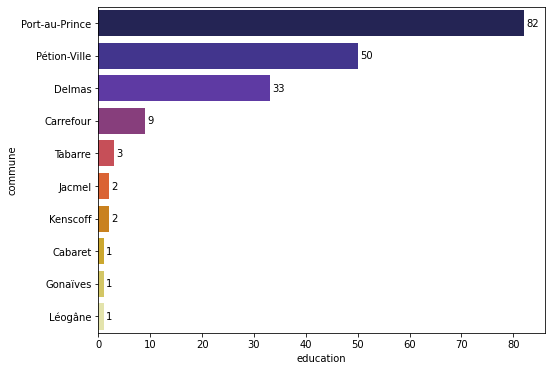

In [20]:
table_bar('education')

### Fashion Sector Activity By Municipality

secteur activite,fashion
commune,
Pétion-Ville,195
Port-au-Prince,64
Delmas,41
Tabarre,10
Carrefour,5
Kenscoff,3
Cap-Haïtien,2
Jacmel,2
Saint-Marc,2


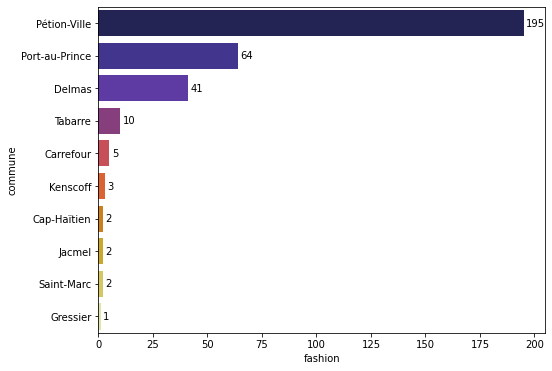

In [21]:
table_bar('fashion')

### Transportation Sector Activity by Municipality

secteur activite,transport
commune,
Port-au-Prince,90
Pétion-Ville,43
Delmas,17
Cap-Haïtien,12
Tabarre,12
Carrefour,2
Gonaïves,1
Jacmel,1
Ouanaminthe,1


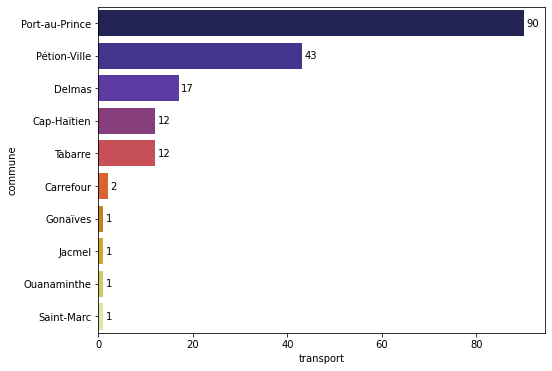

In [22]:
table_bar('transport')

In [23]:
display(final_population.head(2))
display(final_population.info())
#display(commune_geolocalisation.head(2))
#display(dataset.head(2))

,adm2code,adm2_fr,Population,Femmes,Hommes,Enfants,Adultes,Filles,Garcons,Femmes adultes,Hommes adultes,income
0,HT0111,Port-au-Prince,1031710,544921,486789,417341,614369,220396,196945,324525,289844,25937733
1,HT0112,Delmas,413035,217283,195752,174211,238824,91646,82565,125637,113187,10383917


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   adm2code        140 non-null    object
 1   adm2_fr         140 non-null    object
 2   Population      140 non-null    int64 
 3   Femmes          140 non-null    int64 
 4   Hommes          140 non-null    int64 
 5   Enfants         140 non-null    int64 
 6   Adultes         140 non-null    int64 
 7   Filles          140 non-null    int64 
 8   Garcons         140 non-null    int64 
 9   Femmes adultes  140 non-null    int64 
 10  Hommes adultes  140 non-null    int64 
 11  income          140 non-null    int32 
dtypes: int32(1), int64(9), object(2)
memory usage: 12.7+ KB


None

In [24]:
#Tranform Femmes to Dummies Interval
final_population['Femmes_0_30000']=final_population['Femmes'].apply(lambda x : 1 if (x<=30000) else 0)
final_population['Femmes_30000_65000']=final_population['Femmes'].apply(lambda x : 1 if (x>30000 and x<=65000) else 0)
final_population['Femmes_65000_100000']=final_population['Femmes'].apply(lambda x : 1 if (x>65000 and x<=100000) else 0)
final_population['Femmes_100000_250000']=final_population['Femmes'].apply(lambda x : 1 if (x>100000 and x<=250000) else 0)
final_population['Femmes_250000_550000']=final_population['Femmes'].apply(lambda x : 1 if (x>250000 and x<=550000) else 0)

#Transform Hommes to Dummies Interval
final_population['Hommes_0_30000']=final_population['Hommes'].apply(lambda x : 1 if (x<=30000) else 0)
final_population['Hommes_30000_65000']=final_population['Hommes'].apply(lambda x : 1 if (x>30000 and x<=65000) else 0)
final_population['Hommes_65000_100000']=final_population['Hommes'].apply(lambda x : 1 if (x>65000 and x<=100000) else 0)
final_population['Hommes_100000_250000']=final_population['Hommes'].apply(lambda x : 1 if (x>100000 and x<=250000) else 0)
final_population['Hommes_250000_500000']=final_population['Hommes'].apply(lambda x : 1 if (x>250000 and x<=500000) else 0)

#Transform Income to Dummies Interval
final_population['Income_0_1000000']=final_population['income'].apply(lambda x : 1 if (x<=1000000) else 0)
final_population['Income_1000000_10000000']=final_population['income'].apply(lambda x : 1 if (x>1000000 and x<=10000000) else 0)
final_population['Income_10000000_30000000']=final_population['income'].apply(lambda x : 1 if (x>10000000 and x<=30000000) else 0)

In [25]:
popdummies=final_population[['adm2code','Femmes_0_30000','Femmes_30000_65000','Femmes_65000_100000','Femmes_100000_250000','Femmes_250000_550000','Hommes_0_30000','Hommes_30000_65000','Hommes_65000_100000','Hommes_100000_250000','Hommes_250000_500000','Income_0_1000000','Income_1000000_10000000','Income_10000000_30000000']]
popdummies.head()

,adm2code,Femmes_0_30000,Femmes_30000_65000,Femmes_65000_100000,Femmes_100000_250000,Femmes_250000_550000,Hommes_0_30000,Hommes_30000_65000,Hommes_65000_100000,Hommes_100000_250000,Hommes_250000_500000,Income_0_1000000,Income_1000000_10000000,Income_10000000_30000000
0,HT0111,0,0,0,0,1,0,0,0,0,1,0,0,1
1,HT0112,0,0,0,1,0,0,0,0,1,0,0,0,1
2,HT0113,0,0,0,0,1,0,0,0,0,1,0,0,1
3,HT0114,0,0,0,1,0,0,0,0,1,0,0,1,0
4,HT0115,1,0,0,0,0,0,1,0,0,0,0,1,0


In [26]:
dummiestest= pd.get_dummies(dataset['secteur activite'])
dummiestest['adm2code']= dataset['adm2code']
dummiestest['commune']= dataset['commune']
fcol = dummiestest.pop('adm2code')
tcol=dummiestest.pop('commune')
dummiestest.insert(0, 'adm2code', fcol)
dummiestest.insert(1, 'commune', tcol)
dummiestest.head(2)

,adm2code,commune,agroalimentaire,agroalimnetaire,artisanat,commerce,construction,distribution,edition,education,energie,fashion,industrie,informatique,loisirs,maintenance,maison funeraire,medias,mobilier,multi secteur,musique,restauration,sante,service automobile,service courrier,service de securite,service financier,service juridique,service juridiques,service professionnel,services automobile,sport,transport
0,HT0111,Port-au-Prince,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,HT0111,Port-au-Prince,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [27]:
f_merge= pd.merge(left=dummiestest,right=popdummies,on='adm2code', how='inner')
f_merge=f_merge.drop(['adm2code'],1)
f_merge.head()

,commune,agroalimentaire,agroalimnetaire,artisanat,commerce,construction,distribution,edition,education,energie,fashion,industrie,informatique,loisirs,maintenance,maison funeraire,medias,mobilier,multi secteur,musique,restauration,sante,service automobile,service courrier,service de securite,service financier,service juridique,service juridiques,service professionnel,services automobile,sport,transport,Femmes_0_30000,Femmes_30000_65000,Femmes_65000_100000,Femmes_100000_250000,Femmes_250000_550000,Hommes_0_30000,Hommes_30000_65000,Hommes_65000_100000,Hommes_100000_250000,Hommes_250000_500000,Income_0_1000000,Income_1000000_10000000,Income_10000000_30000000
0,Port-au-Prince,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
1,Port-au-Prince,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
2,Port-au-Prince,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
3,Port-au-Prince,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
4,Port-au-Prince,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1


In [28]:
group=f_merge.groupby(by='commune').mean()
group.shape

(24, 44)

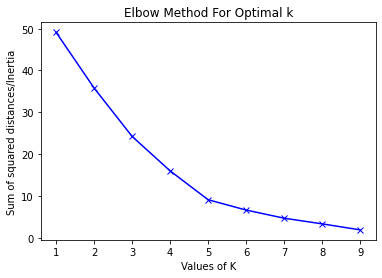

In [29]:
# import k-means from clustering stage
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# X1 = [3, 1, 1, 2, 1, 6, 6, 6, 5, 6, 7, 8, 9, 8, 9, 9, 8]
# X2 = [5, 4, 5, 6, 5, 8, 6, 7, 6, 7, 1, 2, 1, 2, 3, 2, 3]
# plt.scatter(X1,X2)
# plt.show()

Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(group)
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

In [30]:
model = KMeans(n_clusters=5).fit(group)

In [31]:
group['labels'] = model.labels_
group['labels'].values

array([2, 4, 0, 3, 1, 0, 0, 1, 4, 0, 2, 1, 2, 4, 4, 1, 0, 1, 1, 2, 3, 0,
       0, 4])

In [32]:
group.head()

,agroalimentaire,agroalimnetaire,artisanat,commerce,construction,distribution,edition,education,energie,fashion,industrie,informatique,loisirs,maintenance,maison funeraire,medias,mobilier,multi secteur,musique,restauration,sante,service automobile,service courrier,service de securite,service financier,service juridique,service juridiques,service professionnel,services automobile,sport,transport,Femmes_0_30000,Femmes_30000_65000,Femmes_65000_100000,Femmes_100000_250000,Femmes_250000_550000,Hommes_0_30000,Hommes_30000_65000,Hommes_65000_100000,Hommes_100000_250000,Hommes_250000_500000,Income_0_1000000,Income_1000000_10000000,Income_10000000_30000000,labels
commune,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Arcahaie,0.166667,0.0,0.000000,0.000000,0.166667,0.0,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.166667,0.000000,0.000000,0.000000,0.0,0.166667,0.0,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2
Cabaret,0.000000,0.0,0.000000,0.000000,0.428571,0.0,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.285714,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4
Cap-Haïtien,0.014925,0.0,0.014925,0.000000,0.059701,0.0,0.007463,0.000000,0.000000,0.014925,0.000000,0.014925,0.000000,0.000000,0.000000,0.022388,0.014925,0.007463,0.000000,0.246269,0.171642,0.067164,0.000000,0.007463,0.111940,0.052239,0.0,0.082090,0.0,0.000000,0.089552,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
Carrefour,0.092308,0.0,0.030769,0.020513,0.092308,0.0,0.025641,0.046154,0.030769,0.025641,0.015385,0.010256,0.015385,0.020513,0.015385,0.015385,0.035897,0.025641,0.005128,0.102564,0.169231,0.056410,0.010256,0.010256,0.092308,0.000000,0.0,0.020513,0.0,0.005128,0.010256,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3
Cayes-Jacmel,0.083333,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.583333,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.0,0.083333,0.0,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1


In [33]:
group[group['labels']==0]

,agroalimentaire,agroalimnetaire,artisanat,commerce,construction,distribution,edition,education,energie,fashion,industrie,informatique,loisirs,maintenance,maison funeraire,medias,mobilier,multi secteur,musique,restauration,sante,service automobile,service courrier,service de securite,service financier,service juridique,service juridiques,service professionnel,services automobile,sport,transport,Femmes_0_30000,Femmes_30000_65000,Femmes_65000_100000,Femmes_100000_250000,Femmes_250000_550000,Hommes_0_30000,Hommes_30000_65000,Hommes_65000_100000,Hommes_100000_250000,Hommes_250000_500000,Income_0_1000000,Income_1000000_10000000,Income_10000000_30000000,labels
commune,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Cap-Haïtien,0.014925,0.0,0.014925,0.000000,0.059701,0.000000,0.007463,0.000000,0.000000,0.014925,0.00000,0.014925,0.000000,0.000000,0.000000,0.022388,0.014925,0.007463,0.000000,0.246269,0.171642,0.067164,0.000000,0.007463,0.111940,0.052239,0.0,0.082090,0.0,0.000000,0.089552,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
Croix-Des-Bouquets,0.147541,0.0,0.000000,0.000000,0.213115,0.000000,0.016393,0.000000,0.032787,0.000000,0.04918,0.032787,0.000000,0.000000,0.000000,0.016393,0.065574,0.000000,0.000000,0.081967,0.131148,0.049180,0.016393,0.000000,0.098361,0.000000,0.0,0.032787,0.0,0.016393,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
Delmas,0.034146,0.0,0.016260,0.016260,0.117073,0.000000,0.032520,0.053659,0.026016,0.066667,0.00813,0.066667,0.003252,0.011382,0.003252,0.050407,0.016260,0.022764,0.004878,0.078049,0.152846,0.055285,0.006504,0.021138,0.053659,0.000000,0.0,0.048780,0.0,0.006504,0.027642,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
Gonaïves,0.000000,0.0,0.000000,0.052632,0.000000,0.026316,0.026316,0.026316,0.000000,0.000000,0.00000,0.052632,0.000000,0.000000,0.000000,0.000000,0.026316,0.000000,0.000000,0.131579,0.184211,0.026316,0.000000,0.000000,0.263158,0.157895,0.0,0.000000,0.0,0.000000,0.026316,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
Léogâne,0.062500,0.0,0.000000,0.031250,0.156250,0.000000,0.031250,0.031250,0.000000,0.000000,0.00000,0.093750,0.000000,0.000000,0.000000,0.062500,0.000000,0.031250,0.000000,0.125000,0.125000,0.031250,0.031250,0.000000,0.125000,0.000000,0.0,0.062500,0.0,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
Pétion-Ville,0.040120,0.0,0.032335,0.055689,0.082635,0.001198,0.035928,0.029940,0.011377,0.116766,0.00000,0.042515,0.016766,0.004192,0.002395,0.038323,0.025749,0.002994,0.000000,0.111377,0.131737,0.029341,0.000000,0.011377,0.029341,0.015569,0.0,0.101198,0.0,0.005389,0.025749,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
Saint-Marc,0.036364,0.0,0.018182,0.018182,0.072727,0.018182,0.018182,0.000000,0.000000,0.036364,0.00000,0.036364,0.000000,0.000000,0.000000,0.109091,0.018182,0.000000,0.000000,0.163636,0.072727,0.054545,0.000000,0.018182,0.181818,0.090909,0.0,0.018182,0.0,0.000000,0.018182,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0


In [34]:
group[group['labels']==1]

,agroalimentaire,agroalimnetaire,artisanat,commerce,construction,distribution,edition,education,energie,fashion,industrie,informatique,loisirs,maintenance,maison funeraire,medias,mobilier,multi secteur,musique,restauration,sante,service automobile,service courrier,service de securite,service financier,service juridique,service juridiques,service professionnel,services automobile,sport,transport,Femmes_0_30000,Femmes_30000_65000,Femmes_65000_100000,Femmes_100000_250000,Femmes_250000_550000,Hommes_0_30000,Hommes_30000_65000,Hommes_65000_100000,Hommes_100000_250000,Hommes_250000_500000,Income_0_1000000,Income_1000000_10000000,Income_10000000_30000000,labels
commune,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Cayes-Jacmel,0.083333,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.083333,0.0,0.000000,0.0,0.583333,0.000000,0.000000,0.0,0.0,0.000000,0.166667,0.0,0.083333,0.0,0.0,0.0,1.000000,0.000000,0.0,0.0,0.0,1.000000,0.000000,0.0,0.0,0.0,0.000000,1.000000,0.0,1
Fort-Liberté,0.000000,0.076923,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.076923,0.0,0.0,0.0,0.076923,0.0,0.000000,0.0,0.153846,0.000000,0.230769,0.0,0.0,0.230769,0.153846,0.0,0.000000,0.0,0.0,0.0,1.000000,0.000000,0.0,0.0,0.0,1.000000,0.000000,0.0,0.0,0.0,1.000000,0.000000,0.0,1
Gressier,0.200000,0.000000,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.066667,0.066667,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.200000,0.066667,0.0,0.0,0.133333,0.000000,0.0,0.066667,0.0,0.0,0.0,1.000000,0.000000,0.0,0.0,0.0,1.000000,0.000000,0.0,0.0,0.0,1.000000,0.000000,0.0,1
Limonade,0.250000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.250000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.500000,0.0,0.000000,0.0,0.0,0.0,1.000000,0.000000,0.0,0.0,0.0,1.000000,0.000000,0.0,0.0,0.0,0.000000,1.000000,0.0,1
Milot,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.250000,0.250000,0.000000,0.0,0.0,0.250000,0.250000,0.0,0.000000,0.0,0.0,0.0,1.000000,0.000000,0.0,0.0,0.0,1.000000,0.000000,0.0,0.0,0.0,1.000000,0.000000,0.0,1
Ouanaminthe,0.166667,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.166667,0.0,0.0,0.0,0.000000,0.0,0.166667,0.0,0.166667,0.166667,0.000000,0.0,0.0,0.166667,0.000000,0.0,0.000000,0.0,0.0,0.0,0.833333,0.166667,0.0,0.0,0.0,0.833333,0.166667,0.0,0.0,0.0,0.666667,0.333333,0.0,1


In [35]:
group[group['labels']==2]

,agroalimentaire,agroalimnetaire,artisanat,commerce,construction,distribution,edition,education,energie,fashion,industrie,informatique,loisirs,maintenance,maison funeraire,medias,mobilier,multi secteur,musique,restauration,sante,service automobile,service courrier,service de securite,service financier,service juridique,service juridiques,service professionnel,services automobile,sport,transport,Femmes_0_30000,Femmes_30000_65000,Femmes_65000_100000,Femmes_100000_250000,Femmes_250000_550000,Hommes_0_30000,Hommes_30000_65000,Hommes_65000_100000,Hommes_100000_250000,Hommes_250000_500000,Income_0_1000000,Income_1000000_10000000,Income_10000000_30000000,labels
commune,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Arcahaie,0.166667,0.0,0.000000,0.000000,0.166667,0.000000,0.166667,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.166667,0.000000,0.166667,0.0,0.000000,0.000000,0.000000,0.166667,0.00000,0.00,0.00000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2
Grand-Goâve,0.000000,0.0,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.400000,0.000000,0.000000,0.200000,0.0,0.000000,0.000000,0.000000,0.200000,0.00000,0.00,0.00000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2
Jacmel,0.070796,0.0,0.035398,0.026549,0.097345,0.017699,0.008850,0.017699,0.0,0.017699,0.0,0.00885,0.0,0.0,0.0,0.079646,0.00885,0.0,0.0,0.300885,0.070796,0.017699,0.000000,0.0,0.070796,0.017699,0.061947,0.044248,0.00885,0.00,0.00885,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2
Petit-Goâve,0.000000,0.0,0.000000,0.000000,0.250000,0.000000,0.050000,0.000000,0.0,0.000000,0.1,0.00000,0.0,0.0,0.0,0.050000,0.00000,0.0,0.0,0.100000,0.000000,0.000000,0.050000,0.0,0.200000,0.000000,0.000000,0.150000,0.00000,0.05,0.00000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2


In [36]:
group[group['labels']==3]

,agroalimentaire,agroalimnetaire,artisanat,commerce,construction,distribution,edition,education,energie,fashion,industrie,informatique,loisirs,maintenance,maison funeraire,medias,mobilier,multi secteur,musique,restauration,sante,service automobile,service courrier,service de securite,service financier,service juridique,service juridiques,service professionnel,services automobile,sport,transport,Femmes_0_30000,Femmes_30000_65000,Femmes_65000_100000,Femmes_100000_250000,Femmes_250000_550000,Hommes_0_30000,Hommes_30000_65000,Hommes_65000_100000,Hommes_100000_250000,Hommes_250000_500000,Income_0_1000000,Income_1000000_10000000,Income_10000000_30000000,labels
commune,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Carrefour,0.092308,0.0,0.030769,0.020513,0.092308,0.000000,0.025641,0.046154,0.030769,0.025641,0.015385,0.010256,0.015385,0.020513,0.015385,0.015385,0.035897,0.025641,0.005128,0.102564,0.169231,0.056410,0.010256,0.010256,0.092308,0.0,0.0,0.020513,0.0,0.005128,0.010256,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3
Port-au-Prince,0.052247,0.0,0.015152,0.037095,0.069488,0.007315,0.032393,0.042842,0.018809,0.033438,0.010449,0.038662,0.002612,0.008882,0.007315,0.021944,0.026123,0.008882,0.003657,0.048589,0.278997,0.091432,0.000000,0.003135,0.035005,0.0,0.0,0.052247,0.0,0.006270,0.047022,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3


In [37]:
group[group['labels']==4]

,agroalimentaire,agroalimnetaire,artisanat,commerce,construction,distribution,edition,education,energie,fashion,industrie,informatique,loisirs,maintenance,maison funeraire,medias,mobilier,multi secteur,musique,restauration,sante,service automobile,service courrier,service de securite,service financier,service juridique,service juridiques,service professionnel,services automobile,sport,transport,Femmes_0_30000,Femmes_30000_65000,Femmes_65000_100000,Femmes_100000_250000,Femmes_250000_550000,Hommes_0_30000,Hommes_30000_65000,Hommes_65000_100000,Hommes_100000_250000,Hommes_250000_500000,Income_0_1000000,Income_1000000_10000000,Income_10000000_30000000,labels
commune,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Cabaret,0.000000,0.0,0.000000,0.000000,0.428571,0.000,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.285714,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4
Ganthier,0.500000,0.0,0.000000,0.000000,0.500000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4
Kenscoff,0.119048,0.0,0.071429,0.023810,0.071429,0.000,0.023810,0.047619,0.000000,0.071429,0.000000,0.000000,0.023810,0.00000,0.023810,0.000000,0.023810,0.02381,0.000000,0.380952,0.047619,0.000000,0.000000,0.000000,0.023810,0.0,0.0,0.023810,0.0,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4
Limbé,0.000000,0.0,0.000000,0.000000,0.000000,0.125,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.125000,0.5,0.0,0.000000,0.0,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4
Tabarre,0.087302,0.0,0.011905,0.039683,0.182540,0.000,0.007937,0.011905,0.027778,0.039683,0.007937,0.047619,0.011905,0.02381,0.007937,0.011905,0.059524,0.02381,0.007937,0.095238,0.099206,0.083333,0.000000,0.003968,0.031746,0.0,0.0,0.015873,0.0,0.011905,0.047619,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4


In [38]:
group[group['labels']==5]

,agroalimentaire,agroalimnetaire,artisanat,commerce,construction,distribution,edition,education,energie,fashion,industrie,informatique,loisirs,maintenance,maison funeraire,medias,mobilier,multi secteur,musique,restauration,sante,service automobile,service courrier,service de securite,service financier,service juridique,service juridiques,service professionnel,services automobile,sport,transport,Femmes_0_30000,Femmes_30000_65000,Femmes_65000_100000,Femmes_100000_250000,Femmes_250000_550000,Hommes_0_30000,Hommes_30000_65000,Hommes_65000_100000,Hommes_100000_250000,Hommes_250000_500000,Income_0_1000000,Income_1000000_10000000,Income_10000000_30000000,labels
commune,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
